In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
data=pd.read_csv(r"C:\Users\mail2\OneDrive\Desktop\Ml_Data\Data_2019\Salaries.csv")

In [5]:
data

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [6]:
data.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


In [8]:
data.dtypes

Unnamed: 0        int64
rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [9]:
data_select=data.iloc[:,[3,4,6]]

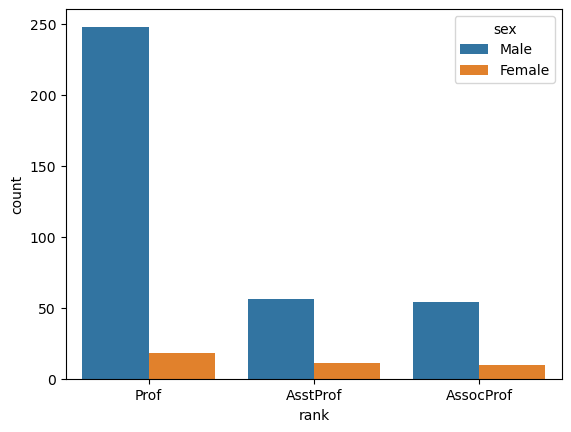

In [15]:
sb.countplot(x="rank",data=data,hue="sex")
plt.show()

# Numarical Value

In [17]:
#realtion between salary <>phd,service

In [10]:
data_select

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


### 1.Linear Relastionship

In [18]:
data_select.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


### Rainbow test
### Null Hypothesis........the data is linear
### Alternate Hypo.........data is not linear

In [23]:
data_select.head(1)

,yrs.since.phd,yrs.service,salary
0,19,18,139750


In [25]:
X_ID=data_select.iloc[:,0:2]
Y_dv=data_select["salary"]

In [27]:
#X_ID

In [21]:
import statsmodels.api as sm

In [28]:
myLrModel=sm.OLS(Y_dv,X_ID).fit()

In [31]:
#dir(myLrModel)

In [19]:
from statsmodels.stats.api import linear_rainbow,het_goldfeldquandt

In [32]:
sats=linear_rainbow(myLrModel)

In [33]:
sats

(0.8839217759430789, 0.8067838311513003)

In [34]:
# p value is >.05 -we neet to select NULL
#p value is <.05 H0 Null will rejet

In [37]:
if sats[0]>.05:
    print('the p value is ',round(sats[1],4),'>.05 So Reject the Null')
else:
    print('the p value is ',round(sats[1],4),'<.05 So Accept the Null')

the p value is  0.8068 >.05 So Reject the Null


### Normality Test
##Q-Q

In [39]:
data_select.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

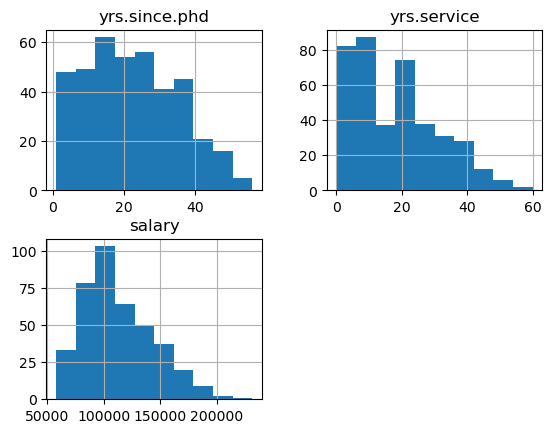

In [41]:
data_select.hist()
plt.show()

### linear Regression 

In [43]:
X_ID

,yrs.since.phd,yrs.service
0,19,18
1,20,16
2,4,3
3,45,39
4,40,41
...,...,...
392,33,30
393,31,19
394,42,25
395,25,15


In [44]:
Y_dv

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
trainer=LinearRegression()

In [47]:
learner=trainer.fit(X_ID,Y_dv)

In [48]:
learner.coef_

array([1562.88890188, -629.10138909])

In [49]:
learner.intercept_

89912.18446381262

In [59]:
#Y_dv.values.tolist()

In [67]:
Ytar=Y_dv.values

In [69]:
Ytar.ndim

1

In [71]:
Yp=learner.predict(X_ID)

In [74]:
data_select["Yp"]=Yp

C:\Users\mail2\AppData\Local\Temp\ipykernel_11796\3449795593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_select["Yp"]=Yp


In [75]:
data_select

,yrs.since.phd,yrs.service,salary,Yp
0,19,18,139750,108283.248596
1,20,16,173200,111104.340276
2,4,3,79750,94276.435904
3,45,39,115000,135707.230874
4,40,41,141500,126634.583586
...,...,...,...,...
392,33,30,103106,122614.476553
393,31,19,150564,126408.814029
394,42,25,101738,139825.983616
395,25,15,95329,119547.886175


In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
Error=mean_squared_error(Yp,Y_dv)

In [78]:
Error

742757377.967049

### Use Cat Feature

In [80]:
data=data.iloc[:,1:]

In [86]:
X_input=data.iloc[:,0:5]
Y_salar=data["salary"]

In [87]:
X_input.head(1)

,rank,discipline,yrs.since.phd,yrs.service,sex
0,Prof,B,19,18,Male


### Encode Cate value into Num

In [90]:
X_trasform=pd.get_dummies(X_input)

In [89]:
model=LinearRegression()

In [93]:
model_learner=model.fit(X_trasform,Y_dv)

In [94]:
model_learner.coef_

array([   535.05828196,   -489.51571521,  -6416.9409573 , -19324.5288571 ,
        25741.4698144 ,  -7208.81278527,   7208.81278527,  -2391.74641834,
         2391.74641834])

In [95]:
model_learner.intercept_

94880.32041744135